# ENGR 371 - Housing affordability in Canada

## Purpose
The purpose of the following document is to demonstrate the calculations required to support the hypothesis outlined below.

## Hypothesis
The average remaining mortgage owed on the dwelling is greater than the average household income.

## Context
The population is all private households in Canada who have a mortgage on their dwelling.
It is important to analyze the relationship between household income and the amount of mortgage debt that a household is carrying. 
This information can be useful in a variety of contexts, such as understanding the ratio of debt versus income of Canadian households and their financial health.


## Methodology
This statistical research is based on the data collected by Statistics Canada in 2021 and published as part of a statistical research available [here](https://www23.statcan.gc.ca/imdb/p2SV.pl?Function=getSurvey&Id=793713).
Data sources and methodology as well as references are available [here](https://www23.statcan.gc.ca/imdb/p2SV.pl?Function=getSurvey&Id=793713)
The following project is based on a limited set of data collected from the aforementioned survey and is analyzed using Student's t test and various other techniques.

## Results
As shown in the following section, the claim is proven to be correct. The average mortgage balanced by a household exceeds the annualized household income.
Although, the debt to income ratio is alarmingly high according to our research, it is important to take into account that the survey it is based on was conducted in 2021.
The global pandemic and the recession had a significant impact on the household income, real estate market and purchasing power of all Canadian households.
We expect that the new survey will uncover more potential issues and will provide an insight into the nature of the Canadian real estate market.

## Suggested next steps
Full code and documentation are available in our [public code repository](https://github.com/vlkyrylenko/stat-project)

# Setup

## Library import
We import all the required Python libraries

In [361]:
# Data manipulation
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import norm
from pathlib import Path
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.offline as ply
ply.init_notebook_mode(connected=True)
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

## Local library import
We import all the required local libraries libraries

In [362]:
# System libraries
import os, sys, glob
import pathlib
# sys.path.append('path/to/local/lib')
abs_path = os.path.abspath('')
os.chdir(abs_path)

# Import local libraries
from stat_analysis import STAT

# Parameter definition

<dl><li>POWN_80 - Shelter costs for owners - $ amount currently owed on mortgage - In CAD</li>
<li>PHHTTINC - Total income of household - In CAD</li>
<li>PUMFID - Respondent personal unique identifier</li></dl>


# Data import
Retrieve all the required data for the analysis.
The data was extracted from the [Statics Canada web site](https://www150.statcan.gc.ca/n1/pub/46-25-0001/2021001/2021.zip) and stored in csv format.
The following survey has over 40,000 respondents. However, since the goal of this project is to test the aforementioned hypothesis, only a subset of the survey data has been used.
The mean and standard deviation used to calculate the t score for each attribute were calculated using the original data to minimize the error while ignoring missing values.

# Data processing
The following process is based on a custom class functions in combination with SciPy, NumPy, and Pandas.
For more information, please refer to the documentation and code repository.

1. Calculate the mean of the remaining mortgage owned using the following code:

In [363]:
# Export csv file as a data frame and calculate statistical parameters
# POWN_80 - Shelter costs for owners - $ amount currently owed on mortgage
STAT.append_csv('./data/data.csv', dropNaN=True)
STAT.get_parameters('./data/new_data.csv','POWN_80')
mortgage_mean = STAT.get_parameters.mean
mortgage_std = STAT.get_parameters.std
print('Mean of the remaining mortgage owned is: {:.2f}$ CAD'.format(mortgage_mean))
print('Standard deviation of the remaining mortgage owned is: {:.2f}$ CAD'.format(mortgage_std))

Mean of the remaining mortgage owned is: 195666.83$ CAD
Standard deviation of the remaining mortgage owned is: 156177.76$ CAD


2. Calculate the mean of the household income:

In [364]:
# PHHTTINC - Total income of household
STAT.get_parameters('./data/new_data.csv','PHHTTINC')
income_mean = STAT.get_parameters.mean
income_std = STAT.get_parameters.std
print('Mean of the household income is: {:.2f}$ CAD'.format(income_mean))
print('Standard deviation of the household income is: {:.2f}$ CAD'.format(income_std))

Mean of the household income is: 134899.05$ CAD
Standard deviation of the household income is: 92340.09$ CAD


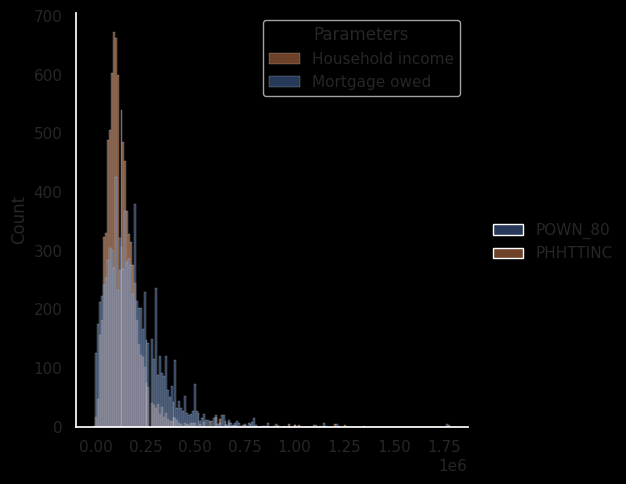

In [365]:
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black', 'axes.grid' : False})
sns.displot([STAT.append_csv.df['POWN_80'],STAT.append_csv.df['PHHTTINC']], kde=False)
plt.legend(title='Parameters', loc='upper right', labels=['Household income', 'Mortgage owed'])

3. Make a claim based on the hypothesis described above.<br><br>
Claim (H1):
        Population mean is greater that 176528.17$ CAD
\begin{align}
\mu \leq = 176528.17 CAD
\end{align}
Opposite (H0):

\begin{align}
        \mu > 176528.17 CAD
        \end{align}

4. Select significance level $\alpha$ equal to 0.01 and sample size $n$ equal to 9118.

5. Calculate T score using the following formula:<br>
*Calculations are based on a custom function that resides within our python class*
\begin{align}
T = \frac{\bar{x} - \mu}{\frac {s}{\sqrt{n}}}
\end{align}

Where<dl><li>$\bar{x}$ is the sample mean of the mortgage balance</li><li>$\mu$ is the population mean represented by the previously arbitrary value</li><li>s is the standard deviation of the mortgage balance </li><li>n is the sample size</li></dl>

1st method:<br><br>
*Custom python class function based on the pandas library. This method uses the unbiased estimator.*

In [366]:
n = len(STAT.append_csv.df.index)
STAT.mean_t(populationMean=income_mean,sampleMean=mortgage_mean,
        sampleSD= mortgage_std,sampleSize=n,significanceLevel=0.01)
# populationMean - nu (from claim), sampleMean - x bar, s - population standard deviation, sampleSize - n
        # Calculate t-score for mean
        # For unknown population mean and standard deviation
        # n > 30 or the population is normally distributed
print("T-score is {:.2f}".format(STAT.mean_t.value))

T-score is 37.15


2nd method:<br><br>
*SciPy statistical functions - right tail test for one sample.*

In [367]:
stats.ttest_1samp(popmean=income_mean,a=STAT.append_csv.df['POWN_80'])

TtestResult(statistic=37.153857767147336, pvalue=1.7558861177799532e-281, df=9117)

Normal distribution chart for $1 \leq \sigma \leq 2$

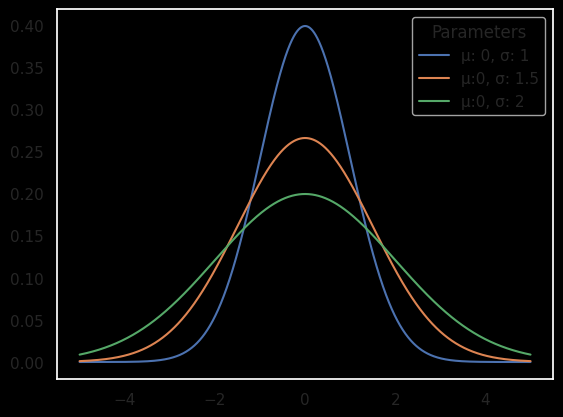

In [368]:
#x-axis ranges from -5 and 5 with .001 steps
x = np.arange(-5, 5, 0.001)

#define multiple normal distributions
plt.plot(x, norm.pdf(x, 0, 1), label='μ: 0, σ: 1')
plt.plot(x, norm.pdf(x, 0, 1.5), label='μ:0, σ: 1.5')
plt.plot(x, norm.pdf(x, 0, 2), label='μ:0, σ: 2')
plt.legend(title='Parameters')

#### Finding Right-Tailed P-value from T-distribution and Degrees of Freedom<br>
This method is based on the SciPy survival function.

In [369]:
# P-value in the right-tailed test:
stats.t.sf(abs(STAT.mean_t.value),df=n-1)
# where the first argument is the t-score, and the second argument is the degrees of freedom.

8.779430588896769e-282

### Right tail test
#### 1st method
According to the t-tables, the area corresponding to $\alpha = 0.01$ equals to 2.429<br>
The T-score obtained using both methods ($37.15$) is significantly greater than 2.429<br>
Hence, there **is enough** evidence to reject the null hypothesis and support the the claim that the mean mortgage debt is greater than the mean household income.

#### 2nd method
P-value

The P-value obtained using the 2nd method ($8.779430588896769e^{-282}$) is significantly smaller than our significance level.<br>
Hence, there **is enough** evidence to reject the null hypothesis based on the P-value.

# References

1. Canadian Housing Survey: Public use of microdata file, 2021 DOI: https://doi.org/10.25318/46250001-eng
2. Volodymyr Kyrylenko, Project repository, Github, 2023, https://github.com/vlkyrylenko/stat-project
3. Brandon Leonard, Statistics Lecture 8.5: Hypothesis Testing for Population Mean. Population Std Dev is Unknown., 2011 https://youtu.be/onTQhD7osY4